In [8]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import DataFrame
from pandas import Grouper
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
# from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [9]:
# tỉ lệ 8:2
df = pd.read_csv('nvl.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df[::-1]

df = df.reset_index(drop=True) # Reset the index

In [10]:
scaler = StandardScaler()
df1 = scaler.fit_transform(np.array(df).reshape(-1, 1))


In [11]:
# Assuming df is your DataFrame containing your data
train_size = int(0.8 * len(df))

# Split the data into training and testing sets
train_data = df1[:train_size]
test_data = df1[train_size:]



In [12]:
train_data

array([[-0.59472206],
       [-0.56936762],
       [-0.5567117 ],
       ...,
       [-1.00444127],
       [-1.03427003],
       [-1.08540503]])

In [13]:
from tbats import BATS, TBATS
# 3. Quá trình Training
y_train = np.array(train_data)

estimator = TBATS(
    seasonal_periods=[12, 30.25],
    use_arma_errors=True,
    use_box_cox=True
)
model = estimator.fit(y_train)


In [14]:
# 4. Quá trình testing
y_test = np.array(test_data)
y_pred =  model.forecast(steps=341)

In [15]:
print(y_pred[-30:])

[-1.31638458 -1.31638458 -1.31638458 -1.31638458 -1.31638458 -1.31638458
 -1.31638458 -1.31638458 -1.31638458 -1.31638458 -1.31638458 -1.31638458
 -1.31638458 -1.31638458 -1.31638458 -1.31638458 -1.31638458 -1.31638458
 -1.31638458 -1.31638458 -1.31638458 -1.31638458 -1.31638458 -1.31638458
 -1.31638458 -1.31638458 -1.31638458 -1.31638458 -1.31638458 -1.31638458]


In [16]:

y_next_30_days = y_pred[-30:]
y_pred = y_pred[:311]
print(y_pred)
print(y_next_30_days)

[-1.10367424 -1.11610926 -1.12781732 -1.13884093 -1.14922011 -1.15899252
 -1.16819363 -1.17685685 -1.18501362 -1.19269355 -1.19992451 -1.20673275
 -1.21314298 -1.21917846 -1.22486112 -1.23021157 -1.23524923 -1.23999239
 -1.24445826 -1.24866306 -1.25262205 -1.2563496  -1.25985924 -1.2631637
 -1.26627498 -1.26920438 -1.27196253 -1.27455944 -1.27700453 -1.27930668
 -1.28147425 -1.2835151  -1.28543665 -1.28724586 -1.2889493  -1.29055316
 -1.29206327 -1.29348509 -1.29482379 -1.29608423 -1.29727098 -1.29838836
 -1.29944042 -1.30043097 -1.30136362 -1.30224174 -1.30306853 -1.30384698
 -1.30457993 -1.30527003 -1.30591978 -1.30653155 -1.30710756 -1.30764989
 -1.30816052 -1.3086413  -1.30909397 -1.30952018 -1.30992147 -1.3102993
 -1.31065505 -1.31098999 -1.31130536 -1.31160229 -1.31188186 -1.31214509
 -1.31239293 -1.31262628 -1.31284599 -1.31305286 -1.31324763 -1.31343101
 -1.31360368 -1.31376625 -1.31391932 -1.31406344 -1.31419913 -1.31432689
 -1.31444718 -1.31456044 -1.31466708 -1.31476749 -1.3

In [17]:
train_data = df[:train_size]
test_data = df[train_size:]
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_next_30_days = scaler.inverse_transform(y_next_30_days.reshape(-1, 1))


In [18]:
test_mae = mean_absolute_error(test_data, y_pred)
test_mape = mean_absolute_percentage_error(test_data, y_pred)
test_rmse = sqrt(mean_squared_error(test_data, y_pred))

print('MAE:', test_mae)
print('RMSE:', test_rmse)
print('MAPE:', test_mape)


MAE: 4315.9009195113
RMSE: 5049.059280679139
MAPE: 0.26117100839628216


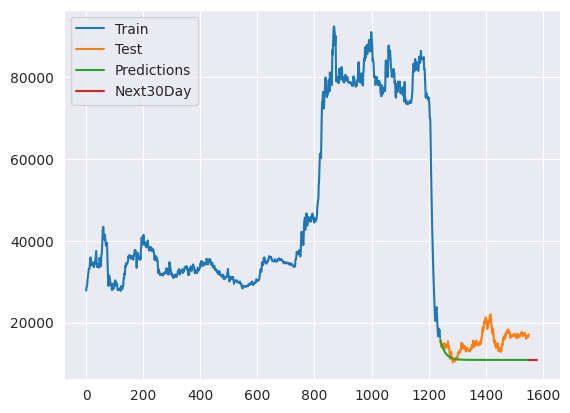

In [19]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()